['Team' 'Minutes' 'Goals' 'Assists' 'Penalty Shoot on Goal'
 'Penalty Shoot' 'Total Shoot' 'Shoot on Target' 'Yellow Cards'
 'Red Cards' 'Touches' 'Dribbles' 'Tackles' 'Blocks'
 'Shot-Creating Actions' 'Goal-Creating Actions' 'Passes Completed'
 'Passes Attempted' 'Pass Completion %' 'Progressive Passes' 'Carries'
 'Progressive Carries' 'Dribble Attempts' 'Successful Dribbles']
            Team  Minutes  Goals  Assists  Penalty Shoot on Goal  \
0     Man United      990      1        1                      0   
1         Fulham      990      0        0                      0   
2      Liverpool      990      2        1                      0   
3      Newcastle      990      1        1                      0   
4  Nott'm Forest      990      1        0                      0   
5    Bournemouth      990      1        0                      0   
6        Everton      990      2        1                      0   
7       Brighton      990      3        3                      0   
8      

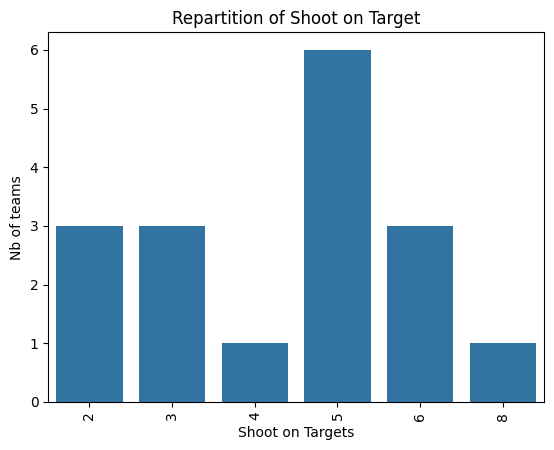

                 PERCENTAGE_OF_VICTORIES
Shoot on Target                         
8                               0.285714
2                               0.340136
4                               0.346939
3                               0.421769
6                               0.489796
5                               0.493197
['Team' 'Minutes' 'Goals' 'Assists' 'Penalty Shoot on Goal'
 'Penalty Shoot' 'Total Shoot' 'Shoot on Target' 'Yellow Cards'
 'Red Cards' 'Touches' 'Dribbles' 'Tackles' 'Blocks'
 'Shot-Creating Actions' 'Goal-Creating Actions' 'Passes Completed'
 'Passes Attempted' 'Pass Completion %' 'Progressive Passes' 'Carries'
 'Progressive Carries' 'Dribble Attempts' 'Successful Dribbles' 'Div'
 'Date' 'Time' 'HomeTeam' 'AwayTeam' 'FTHG' 'FTAG' 'FTR' 'HTHG' 'HTAG'
 'HTR' 'HREMONTADA' 'AREMONTADA' 'Referee' 'NB_MATCHES_PLAYED'
 'NB_VICTORIES' 'PERCENTAGE_OF_VICTORIES']


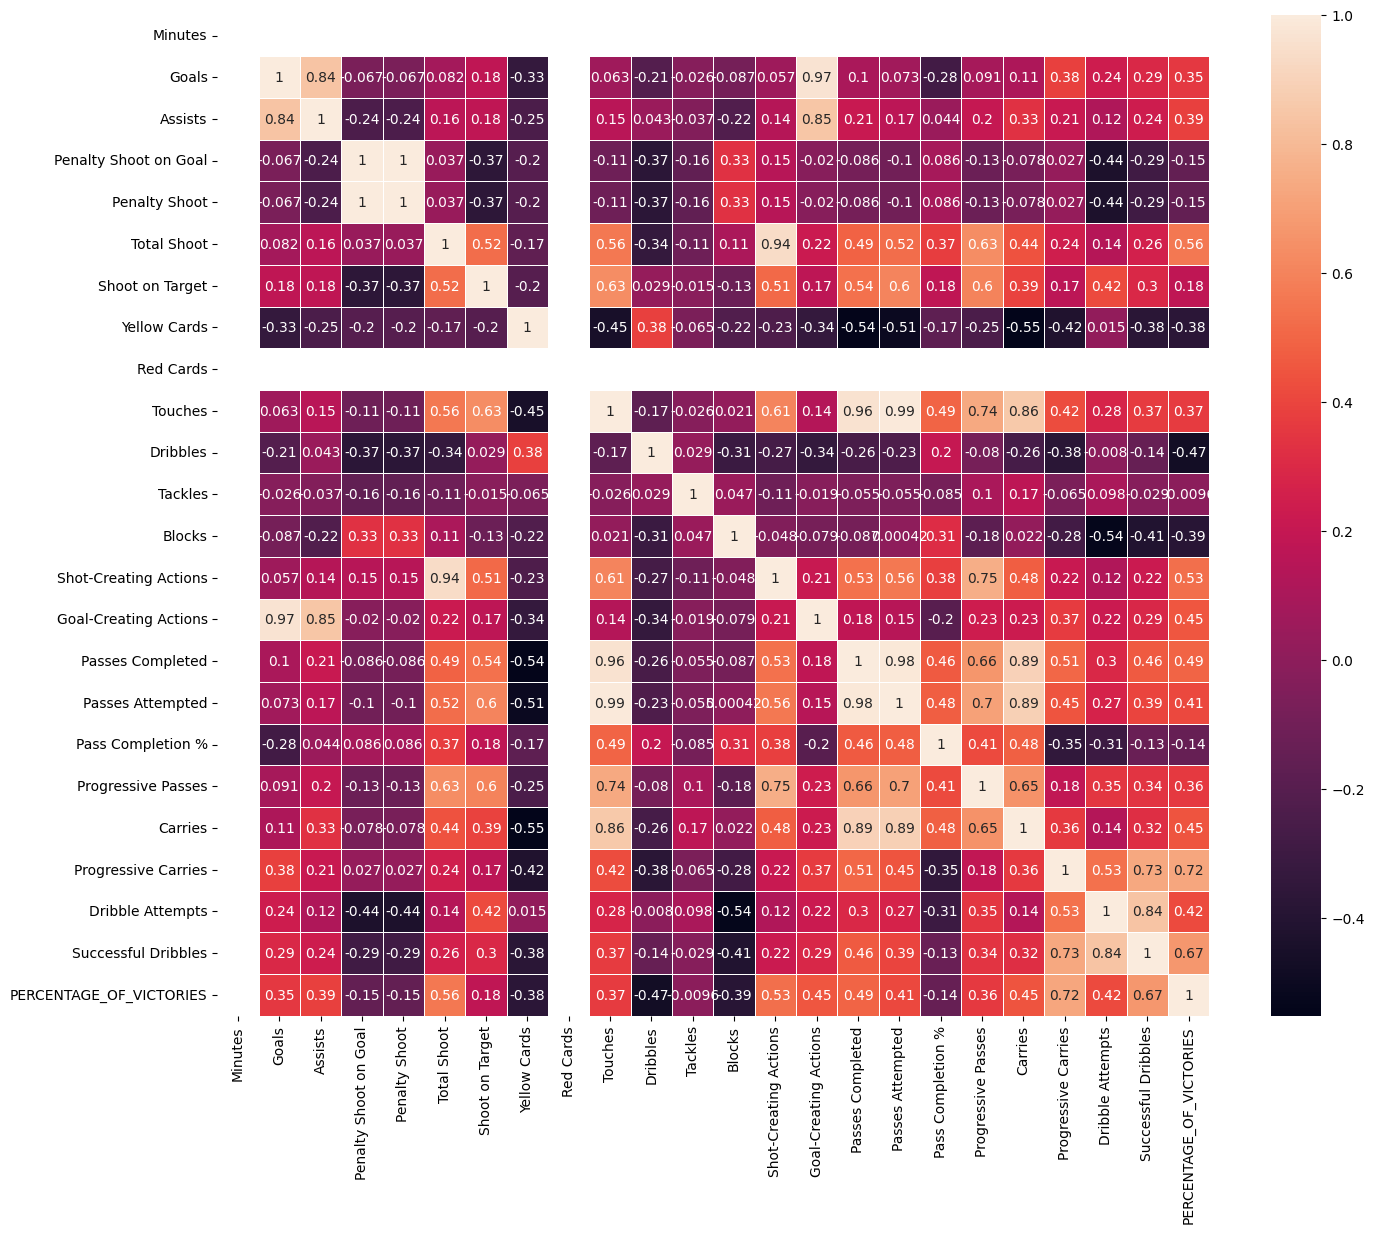

['Unnamed: 0' 'Team' 'Minutes' 'Goals' 'Assists' 'Penalty Shoot on Goal'
 'Penalty Shoot' 'Total Shoot' 'Shoot on Target' 'Yellow Cards'
 'Red Cards' 'Touches' 'Dribbles' 'Tackles' 'Blocks'
 'Shot-Creating Actions' 'Goal-Creating Actions' 'Passes Completed'
 'Passes Attempted' 'Pass Completion %' 'Progressive Passes' 'Carries'
 'Progressive Carries' 'Dribble Attempts' 'Successful Dribbles' 'Div'
 'Date' 'Time' 'HomeTeam' 'AwayTeam' 'FTHG' 'FTAG' 'FTR' 'HTHG' 'HTAG'
 'HTR' 'HREMONTADA' 'AREMONTADA' 'Referee' 'NB_MATCHES_PLAYED'
 'NB_VICTORIES' 'PERCENTAGE_OF_VICTORIES']
[[15  8]
 [17  8]
 [25 11]
 [19  6]
 [18  9]
 [18  5]
 [14  7]
 [18  6]
 [18  9]
 [12  8]
 [20  4]
 [23  8]
 [16  5]
 [14  3]
 [16  4]
 [41 15]
 [24 13]]
[0.44897959 0.36734694 0.67346939 0.46938776 0.28571429 0.34693878
 0.30612245 0.34693878 0.67346939 0.28571429 0.34693878 0.51020408
 0.30612245 0.28571429 0.46938776 0.71428571 0.51020408]
----LINEAR REGRESSION----
----Accuracy =0.2945640543291681
--------------------

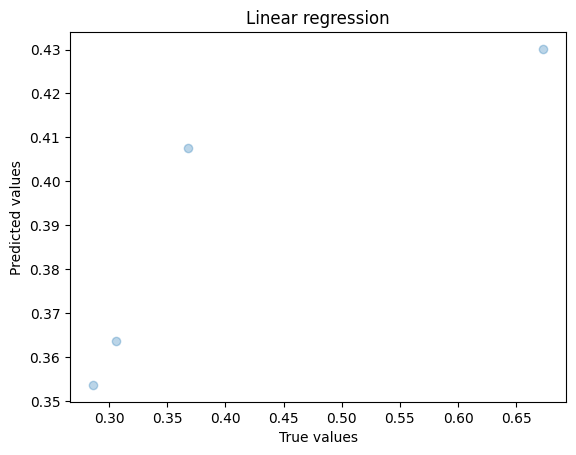

['model/model_premierleague.mod']

In [3]:
import os

os.listdir()
import pandas as pnd



import matplotlib.pyplot as plt


import seaborn as sns



######## TEAMS OBSERVATIONS ###########



# Leicester, Southampton and Ipswich are new in the Premier League. Burnley, Sheffield Utd, Luton are relegated in the Championship (second division) => so not in the dataset


plTeams = pnd.read_csv("Teams2425.csv")


# Display columns of the dataset


print(plTeams.columns.values)


pnd.set_option('display.max_columns', None)


# Display columns of the dataset


print(plTeams.head(10))


# Shape of the dataset


print(plTeams.shape)


# looking for missing infos => no missing infos in this case


print(plTeams.info())



######## FIXTURES OBSERVATIONS ###########



# From 2023 to 2025


plFixtures = pnd.read_csv("Fixtures2325.csv")


# 490 games played between 20230811 and 20241110


plFixtures = plFixtures.head(490)


# Display columns of the dataset


print(plFixtures.columns.values)


# Display the 10 first lines of the dataset


print(plFixtures.head(10))


# Shape of the dataset


print(plFixtures.shape)


# looking for missing infos => unknowned infos of next games are missing


print(plFixtures.info())


# Nb of games played by each teams


nbOfFirstPosition = plFixtures.groupby('HomeTeam').count()


print(nbOfFirstPosition)


nbOfSecondPosition = plFixtures.groupby('AwayTeam').count()


print(nbOfSecondPosition)


totalNbOfGames = nbOfFirstPosition + nbOfSecondPosition


print(totalNbOfGames)


# Nb of victory by winner team (new teams and old teams have few victories as expected)


nbOfVictories = plFixtures.groupby('Winner').count()


print(nbOfVictories)



# percentage of victories by matches played


aggregatedList = plFixtures.groupby('Winner').count()


aggregatedList.sort_index()


print(nbOfFirstPosition.columns.values)


print(nbOfSecondPosition.columns.values)


aggregatedList['NB_MATCHES_PLAYED'] = nbOfFirstPosition.AwayTeam + nbOfSecondPosition.HomeTeam


aggregatedList['NB_VICTORIES'] = nbOfVictories.HomeTeam


aggregatedList['PERCENTAGE_OF_VICTORIES'] = nbOfVictories.HomeTeam/(nbOfFirstPosition.AwayTeam + nbOfSecondPosition.HomeTeam)


print(aggregatedList)


# create new plTeams dataset with additional aggregated insights


newPlTeams = plTeams.merge(aggregatedList,left_on='Team', right_index= True, how='left')


print(newPlTeams)



######## MACHINE LEARNING AND PREMIER LEAGUE ###########



print(newPlTeams.describe())


# Is the hability to shoot on target owned by the best winners?


X_axis = sns.countplot(x="Shoot on Target", data=newPlTeams)


plt.xticks(rotation=90)


plt.xlabel('Shoot on Targets')


plt.ylabel('Nb of teams')


plt.title('Repartition of Shoot on Target')


plt.show()


# Add percentage of victories to newPlTeams


print(newPlTeams.groupby('Shoot on Target').agg({'PERCENTAGE_OF_VICTORIES':"mean"}).sort_values(by="PERCENTAGE_OF_VICTORIES"))


print(newPlTeams.columns.values)



# Heatmap to show correlations between data


# Progressive Carries, Successful Dribbles are the most strongly correlated with "percentage of victories" but are quite correlated with each other


corr=newPlTeams.loc[:,['Minutes',	'Goals',	'Assists',	'Penalty Shoot on Goal',	'Penalty Shoot',	'Total Shoot',	'Shoot on Target',	'Yellow Cards',	'Red Cards',	'Touches',	'Dribbles',	'Tackles',	'Blocks',	'Shot-Creating Actions',	'Goal-Creating Actions',	'Passes Completed',	'Passes Attempted',	'Pass Completion %',	'Progressive Passes',	'Carries',	'Progressive Carries',	'Dribble Attempts',	'Successful Dribbles','PERCENTAGE_OF_VICTORIES']






].corr()


f, ax = plt.subplots(figsize=(16, 13))


sns.heatmap(corr,






            xticklabels=corr.columns,






            yticklabels=corr.columns, annot=True,  linewidths=.5, ax=ax)


plt.show()



# Slicing of observations into training set and test set


# Generate new file with the copy of Dataframe newPlTeams - tabulations used as separator


dataset= newPlTeams


dataset.to_csv("datas/dataset.csv", sep='\t')


dataset= pnd.read_csv("datas/dataset.csv",delimiter='\t')


# delete missing values


dataset = dataset.dropna(axis=0, how='any')


print(dataset.columns.values)


# Select the best features enabling the prediction (.loc Select all rows for specific columns)


X = dataset.loc[
    :, [ "Progressive Carries", "Successful Dribbles"]
].values


print(X)


# Select the feature to predict, 'percentage of victories' in this case


y= dataset.iloc[:,41].values


print(y)


# Create training set (80%) and test set (20%) with Scikit-Learn


from sklearn.model_selection import train_test_split


X_learning, X_validation, Y_learning, Y_validation =train_test_split(X,y,test_size=0.2, random_state=0)



## 1. LINEAR REGRESSION


from sklearn.metrics import r2_score


from sklearn.linear_model import LinearRegression


alg = LinearRegression()


# Learn


alg.fit(X_learning,Y_learning)


# Predict


predictions = alg.predict(X_validation)


# Accuracy comparison of predicted values with expected values


accuracy = r2_score(Y_validation,predictions)


print("----LINEAR REGRESSION----")


print("----Accuracy ="+str(accuracy))
print('--------------------------') 



plt.scatter(Y_validation,predictions, alpha=0.3)


plt.xlabel('True values')


plt.ylabel("Predicted values")


plt.title('Linear regression')


plt.show()



""" ## 2. DECISION TREE


from sklearn.tree import DecisionTreeRegressor


alg = DecisionTreeRegressor()


# Learn


alg.fit(X_learning,Y_learning)


# Predict


predictions = alg.predict(X_validation)


# Accuracy comparison of predicted values with expected values


accuracy = r2_score(Y_validation,predictions)


print("----DECISION TREE----")


print("----Accuracy ="+str(accuracy))
print('--------------------------') 



plt.scatter(Y_validation,predictions, alpha=0.3)


plt.xlabel('True values')


plt.ylabel("Predicted values")


plt.title('Decision Tree for linear regression')
plt.show() """



""" ## 3. RANDOM FOREST


from sklearn.ensemble import RandomForestRegressor


alg = RandomForestRegressor()


# Learn


alg.fit(X_learning,Y_learning)


# Predict


predictions = alg.predict(X_validation)


# Accuracy comparison of predicted values with expected values


accuracy = r2_score(Y_validation,predictions)


print("----RANDOM FOREST----")


print("----Accuracy ="+str(accuracy))
print('--------------------------') 



plt.scatter(Y_validation,predictions, alpha=0.3)


plt.xlabel('True values')


plt.ylabel("Predicted values")


plt.title('Random Forest for linear regression')


plt.show() """


""" ## 4. GRADIENT BOOSTING
from sklearn.metrics import r2_score


from sklearn.ensemble import GradientBoostingRegressor


alg = GradientBoostingRegressor()


# Learn


alg.fit(X_learning,Y_learning)


# Predict


predictions = alg.predict(X_validation)


# Accuracy provided by compairing predicted values with expected values


accuracy = r2_score(Y_validation,predictions)


print("----GRADIENT BOOSTING----")


print("----Accuracy ="+str(accuracy))
print('--------------------------')



plt.scatter(Y_validation,predictions, alpha=0.3)


plt.xlabel('True values')


plt.ylabel("Predicted values")


plt.title('Gradient Boosting for linear regression')



plt.show() """



######## SAVE THE MOST ACCURATE TRAINING MODEL ###########



import joblib






file = 'model/model_premierleague.mod'






joblib.dump(alg, file)